<a href="https://colab.research.google.com/github/renatordasilva/smoke/blob/main/precipxaod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import auth
import gspread
from google.auth import default

# Configurar estilo dos gráficos
plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline

In [2]:
# Autenticar no Google
auth.authenticate_user()
creds, _ = default()

# Conectar ao Google Sheets
gc = gspread.authorize(creds)

# Abrir a planilha pelo URL
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1IDyR1JmrRn4tUrEABe2OvJb1_q2RTHyvrPcOh0u2dVk/edit?usp=sharing"
sheet = gc.open_by_url(spreadsheet_url)

# Selecionar a primeira aba da planilha
worksheet = sheet.get_worksheet(0)

# Converter para DataFrame do pandas
rows = worksheet.get_all_values()
df = pd.DataFrame.from_records(rows)

# Definir a primeira linha como cabeçalho
df.columns = df.iloc[0]
df = df.iloc[1:]

In [3]:
# Visualizar as primeiras linhas
print(df.head())

# Verificar informações sobre as colunas
print("\nInformações do DataFrame:")
print(df.info())

# Verificar estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())

data_types = df.dtypes
print("\nTipos de dados das colunas:")
print(data_types)
print(df)

# Converter colunas numéricas para o tipo correto
df['Anomalia de precipitação'] = df.iloc[:, 0].astype(float)
df['Anomalia de Aerossóis'] = df.iloc[:, 1].astype(float)

#df['Aerossóis'] = pd.to_numeric(df['Aerossóis'])

# Verificar valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())

0 anomalia aerossol anomalia precipitacao gpm
1        0.04637035             0.01976853495
2       -0.06128207            -0.02277653505
3       -0.00063494            -0.06553660205
4        0.12190172            -0.00940296105
5        0.01183533            -0.00091658505

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   anomalia aerossol          21 non-null     object
 1   anomalia precipitacao gpm  21 non-null     object
dtypes: object(2)
memory usage: 468.0+ bytes
None

Estatísticas descritivas:
0      anomalia aerossol anomalia precipitacao gpm
count                 21                        21
unique                21                        21
top           0.04637035             0.01976853495
freq                   1                         1

Tipos de dados das colunas:
0
anomalia aer


Estatísticas da Anomalia de Precipitação:
count    2.100000e+01
mean    -3.304235e-19
std      9.262649e-02
min     -9.716960e-02
25%     -5.213431e-02
50%     -3.374864e-02
75%      2.695534e-02
max      3.277557e-01
Name: Anomalia de precipitação, dtype: float64


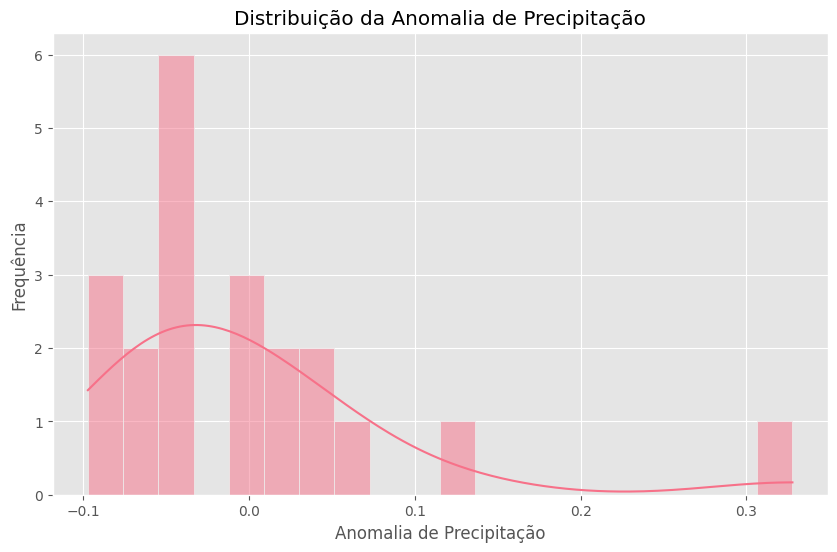

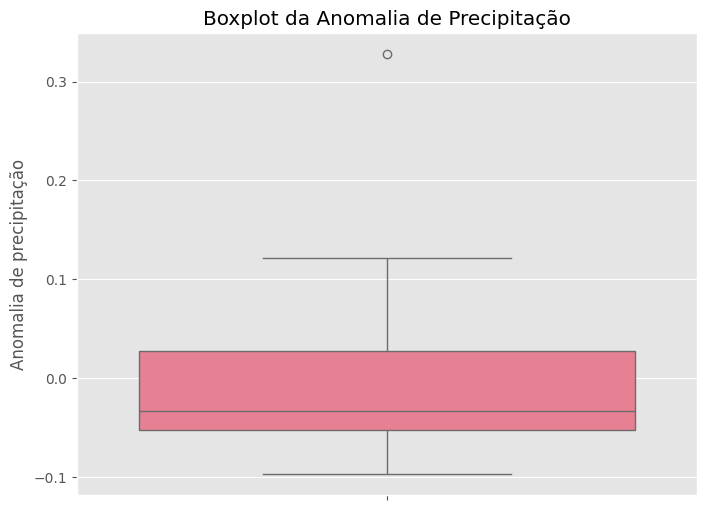

In [4]:
# Estatísticas da anomalia de precipitação
print("\nEstatísticas da Anomalia de Precipitação:")
print(df['Anomalia de precipitação'].describe())

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Anomalia de precipitação'], kde=True, bins=20)
plt.title('Distribuição da Anomalia de Precipitação')
plt.xlabel('Anomalia de Precipitação')
plt.ylabel('Frequência')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Anomalia de precipitação'])
plt.title('Boxplot da Anomalia de Precipitação')
plt.show()


Estatísticas de Aerossóis:
count    2.100000e+01
mean    -2.380953e-12
std      4.631570e-02
min     -6.702850e-02
25%     -4.114185e-02
50%     -1.283065e-03
75%      3.727871e-02
max      7.633391e-02
Name: Anomalia de Aerossóis, dtype: float64


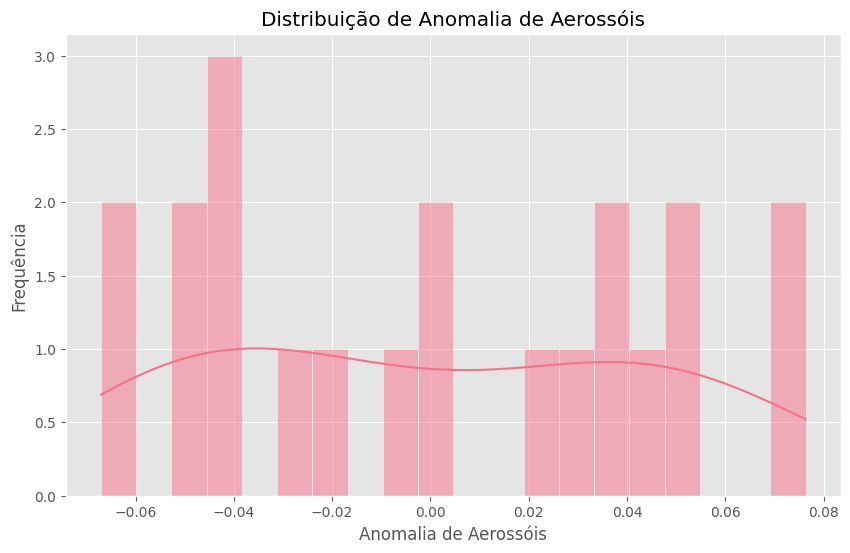

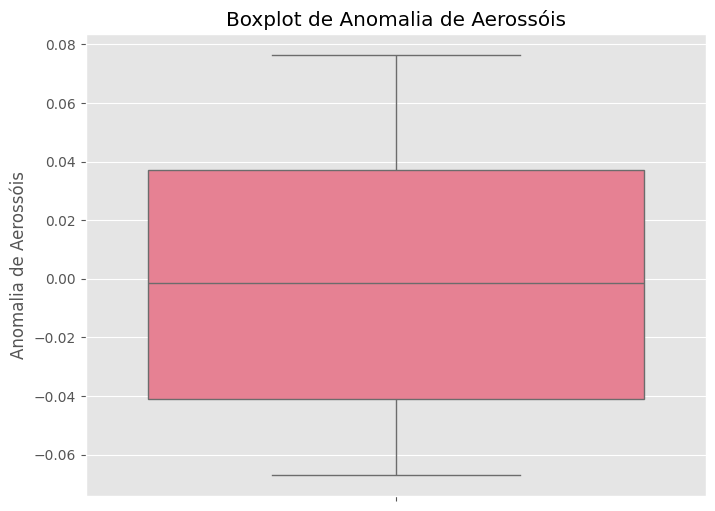

In [5]:
# Estatísticas de aerossóis
print("\nEstatísticas de Aerossóis:")
print(df['Anomalia de Aerossóis'].describe())

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Anomalia de Aerossóis'], kde=True, bins=20)
plt.title('Distribuição de Anomalia de Aerossóis')
plt.xlabel('Anomalia de Aerossóis')
plt.ylabel('Frequência')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Anomalia de Aerossóis'])
plt.title('Boxplot de Anomalia de Aerossóis')
plt.show()

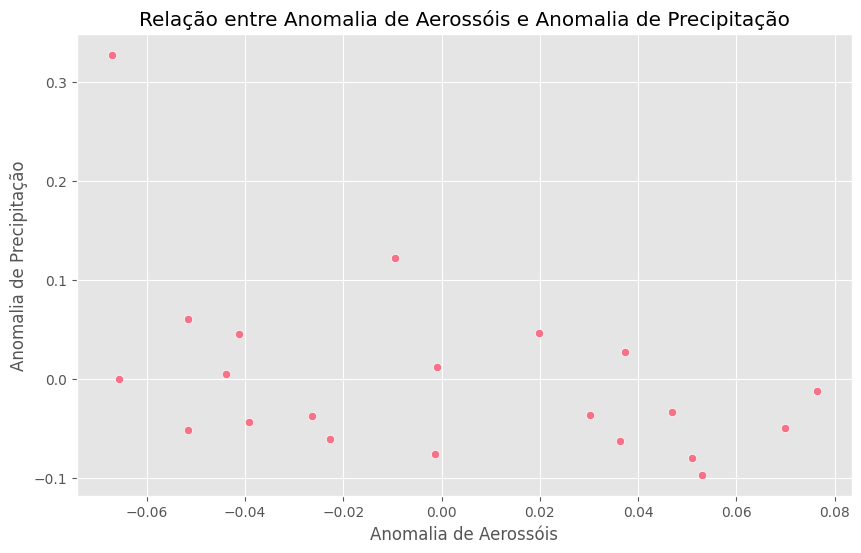


Matriz de correlação:
0                         Anomalia de Aerossóis  Anomalia de precipitação
0                                                                        
Anomalia de Aerossóis                  1.000000                 -0.443015
Anomalia de precipitação              -0.443015                  1.000000


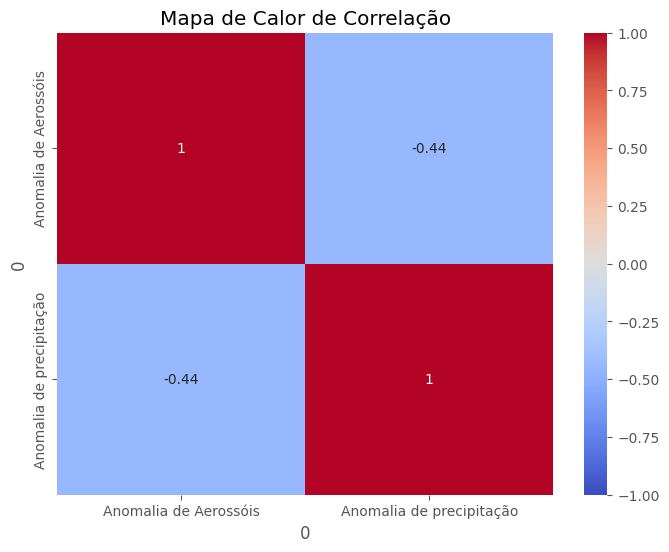

In [6]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Anomalia de Aerossóis', y='Anomalia de precipitação', data=df)
plt.title('Relação entre Anomalia de Aerossóis e Anomalia de Precipitação')
plt.xlabel('Anomalia de Aerossóis')
plt.ylabel('Anomalia de Precipitação')
plt.show()

# Matriz de correlação
correlation = df[['Anomalia de Aerossóis', 'Anomalia de precipitação']].corr()
print("\nMatriz de correlação:")
print(correlation)

# Heatmap de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlação')
plt.show()

In [7]:
# Verificar se há coluna de data (ajuste conforme necessário)
if 'Data' in df.columns:
    # Converter para datetime
    df['Data'] = pd.to_datetime(df['Data'])

    # Plotar série temporal
    plt.figure(figsize=(12, 6))
    plt.plot(df['Data'], df['Anomalia de precipitação'], label='Anomalia de Precipitação')
    plt.plot(df['Data'], df['Anomalia de Aerossóis'], label='Anomalia de Aerossóis')
    plt.title('Série Temporal das Variáveis')
    plt.xlabel('Data')
    plt.ylabel('Valores')
    plt.legend()
    plt.show()


Correlação de Pearson: -0.443, p-valor: 0.0443


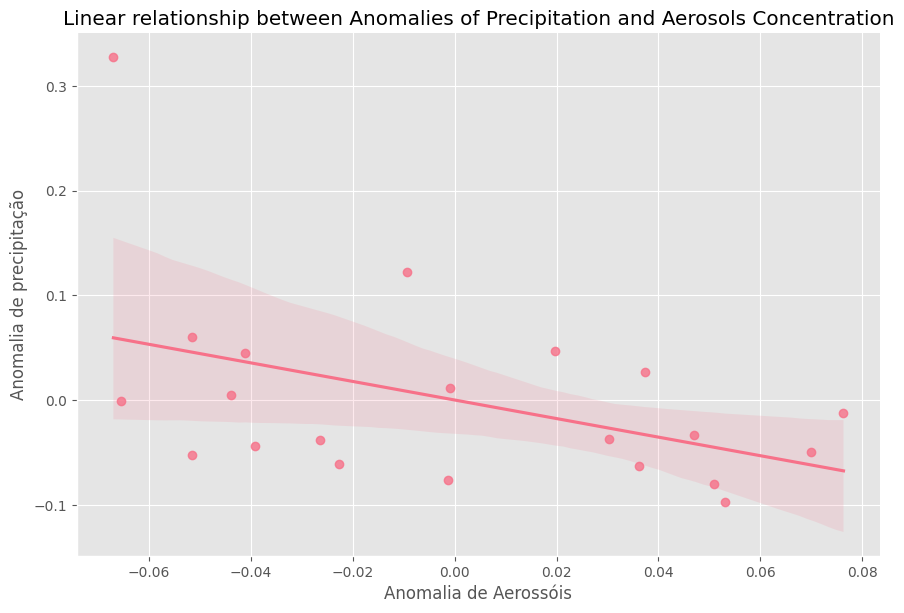

<Figure size 640x480 with 0 Axes>

In [16]:
from scipy import stats

# Teste de correlação de Pearson
pearson_corr, pearson_p = stats.pearsonr(df['Anomalia de Aerossóis'].dropna(), df['Anomalia de precipitação'].dropna())
print(f"\nCorrelação de Pearson: {pearson_corr:.3f}, p-valor: {pearson_p:.3g}")

# Regressão linear simples
sns.lmplot(x='Anomalia de Aerossóis', y='Anomalia de precipitação', data=df, height=6, aspect=1.5)
plt.title('Linear relationship between Anomalies of Precipitation and Aerosols Concentration')
plt.show()
plt.savefig('scatterplot1.png', dpi=300, bbox_inches='tight')

In [17]:
#
stats.spearmanr(df['Anomalia de Aerossóis'], df['Anomalia de precipitação'])

SignificanceResult(statistic=np.float64(-0.42987012987012985), pvalue=np.float64(0.051781881711895524))

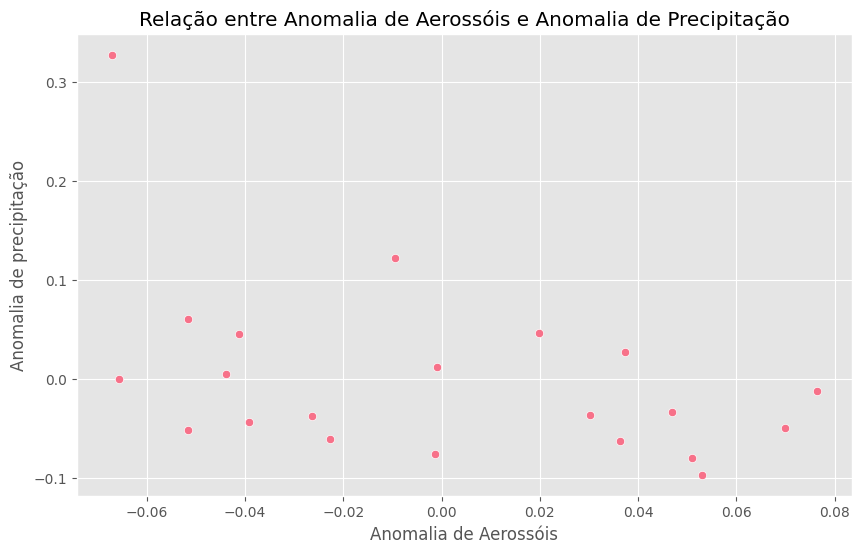

In [12]:
# Salvar DataFrame processado
df.to_csv('dados_processados.csv', index=False)

# Salvar gráficos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Anomalia de Aerossóis', y='Anomalia de precipitação', data=df)
plt.title('Relação entre Anomalia de Aerossóis e Anomalia de Precipitação')
plt.savefig('scatterplot2.png', dpi=300, bbox_inches='tight')